Import Libraries: Imports necessary Python libraries (e.g., pandas, numpy, matplotlib, seaborn) and machine learning modules (e.g., train_test_split, StandardScaler, LinearRegression, DecisionTreeRegressor) for data preparation and model training.

In [544]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

print("Libraries imported successfully!")


Libraries imported successfully!


Load Data: Reads the "Housing Price.csv" dataset into a pandas DataFrame (df) and displays the first five rows for initial inspection.

In [545]:

df = pd.read_csv("/content/Housing Price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Data Info: Prints a summary of the DataFrame, showing the data types of each column and checking for non-null values.

In [546]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


Data Visualization (EDA): Generates a box plot to visualize the distribution of house prices across different numbers of bedrooms.

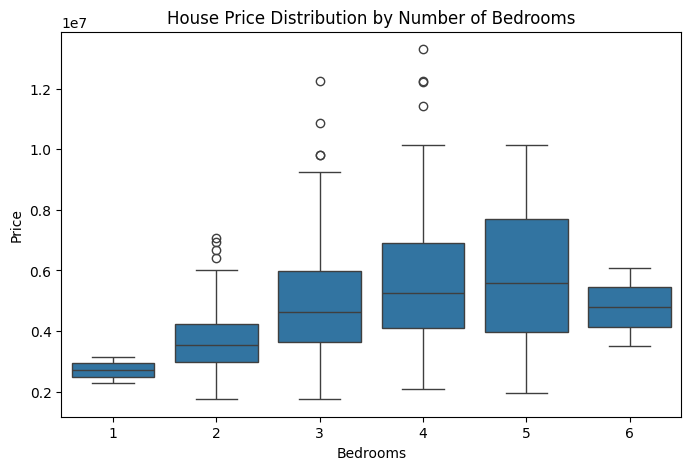

In [547]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title("House Price Distribution by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()



Check for Missing Values: Calculates and prints the count of null (missing) values for every column in the dataset.

In [548]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Check for Duplicates: Counts and prints the total number of duplicate rows in the DataFrame.

In [549]:

print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Binary Encoding: Converts categorical columns with 'yes'/'no' values (like 'mainroad', 'guestroom', etc.) into numerical binary columns (1s and 0s)




In [550]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


One-Hot Encoding: Converts the multi-category 'furnishingstatus' column into numerical dummy variables using One-Hot Encoding and removes the original column.

In [551]:
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})


In [552]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


Separate Features/Target: Separates the dataset into features (X, all columns except 'price') and the target variable (y, the 'price' column).

In [553]:
X = df.drop('price', axis=1)
y = df['price']



Split Data: Splits the X and y data into 80% training sets (X_train, y_train) and 20% testing sets (X_test, y_test).

In [554]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and test sets created.")



Training and test sets created.


Feature Scaling: Uses StandardScaler to standardize the numerical features in the training and testing sets.

In [555]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")


Features scaled successfully.


Simple Linear Regression (SLR): Trains a Simple Linear Regression model on the scaled training data and generates predictions.

In [556]:

slr = LinearRegression()
slr.fit(X_train_scaled, y_train)


slr_pred = slr.predict(X_test_scaled)





Multiple Linear Regression (MLR): Trains a Multiple Linear Regression model using all scaled features and generates predictions.

In [557]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
mlr_pred = mlr.predict(X_test_scaled)


Polynomial Regression: Applies a degree 2 polynomial feature transformation to the scaled data and trains a Linear Regression model on the transformed data.

In [558]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)


KNN Regressor: Trains a K-Nearest Neighbors (KNN) Regressor model with 5 neighbors and generates predictions.

In [559]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


Decision Tree Regressor: Trains a Decision Tree Regressor model and generates predictions.

In [560]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
print("All models trained successfully.")

All models trained successfully.


Visualize Decision Tree: Visualizes the first 3 levels (max depth=3) of the trained Decision Tree model.

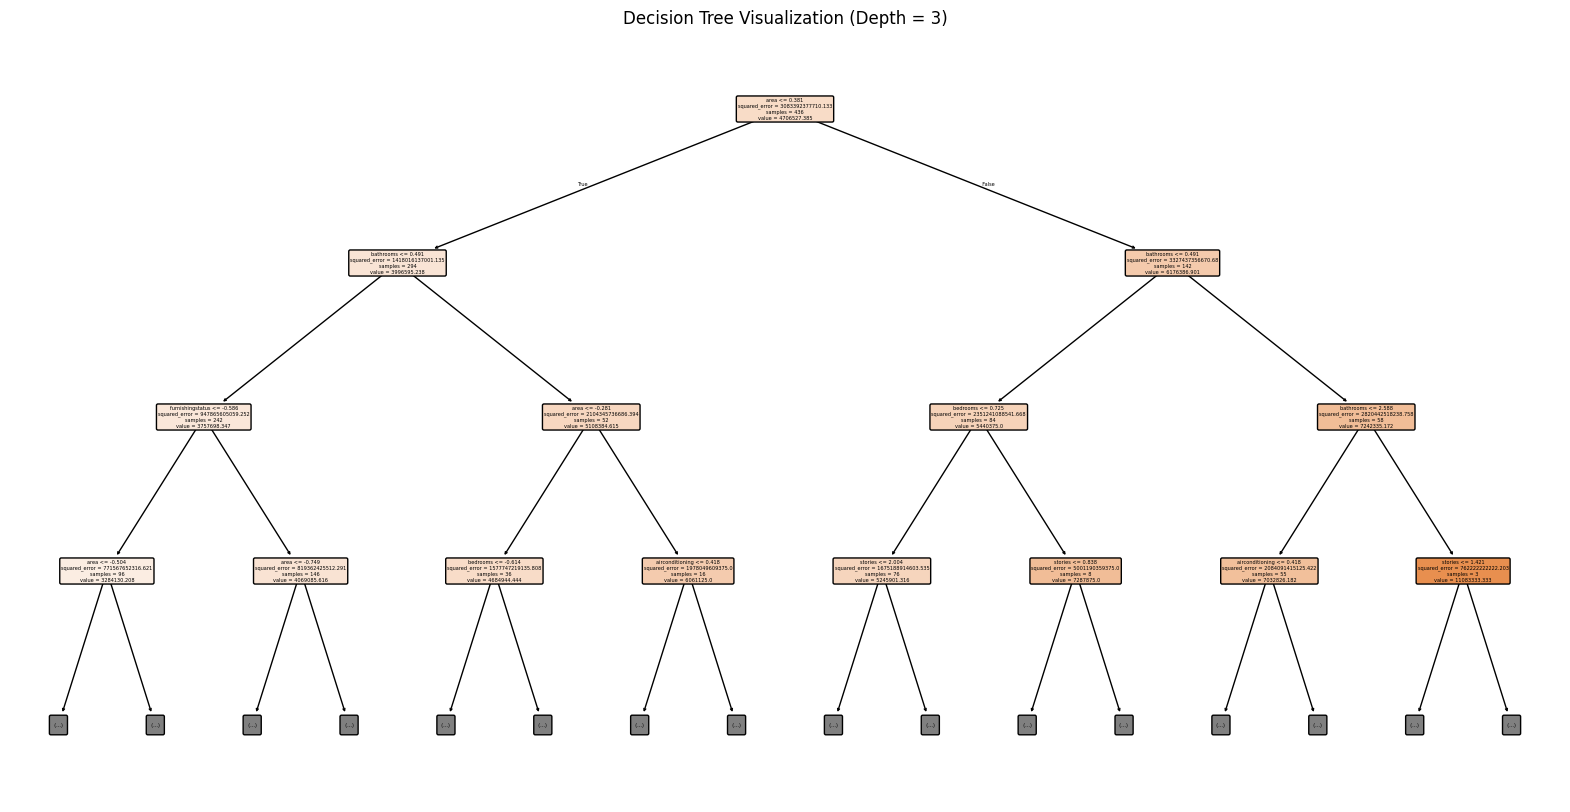

In [561]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    dt,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    max_depth=3
)

plt.title("Decision Tree Visualization (Depth = 3)")
plt.show()


Model Evaluation: Calculates and displays the R-squared and Mean Squared Error (MSE) for all trained regression models in a comparative table.

In [562]:

def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, rmse, mape

Identify Best Model: Identifies and prints the name of the model

In [563]:

score_df = metrics_df.copy()


score_df["RMSE_score"] = 1 - (score_df["RMSE"] - score_df["RMSE"].min()) / (score_df["RMSE"].max() - score_df["RMSE"].min())
score_df["MAPE_score"] = 1 - (score_df["MAPE"] - score_df["MAPE"].min()) / (score_df["MAPE"].max() - score_df["MAPE"].min())


score_df["R2_score"] = (score_df["R2"] - score_df["R2"].min()) / (score_df["R2"].max() - score_df["R2"].min())


score_df["Overall_score"] = score_df[["R2_score", "RMSE_score", "MAPE_score"]].mean(axis=1)

print("Model Performance Metrics (R2, RMSE, MAPE):")
print(metrics_df)

best_model_name = score_df["Overall_score"].idxmax()
print("Best model based on R2, RMSE, MAPE:", best_model_name)



model_objects = {
    "Simple LR": slr,
    "Multiple LR": mlr,
    "Polynomial": poly_model,
    "KNN": knn,
    "Decision Tree": dt
}
best_model = model_objects[best_model_name]


Model Performance Metrics (R2, RMSE, MAPE):
                     R2          RMSE       MAPE
Polynomial     0.651629  1.326976e+06  21.587545
Simple LR      0.649475  1.331071e+06  21.307068
Multiple LR    0.649475  1.331071e+06  21.307068
KNN            0.583257  1.451364e+06  21.822447
Decision Tree  0.418080  1.715038e+06  26.468886
Best model based on R2, RMSE, MAPE: Simple LR


Final SLR Training: Retrains the Simple Linear Regression model (identified as the best model) on the training set for final use.

In [564]:
def predict_house_price(new_data):
    new_data_scaled = scaler.transform(new_data)
    return best_model.predict(new_data_scaled)


New Data Preparation: Creates a new DataFrame for a hypothetical house, ensuring its feature values and encoding match the training data format.

In [565]:

new_house = pd.DataFrame({
    'area': [3500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'parking': [1],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'prefarea': ['yes'],
    'furnishingstatus': ['semi-furnished']
})



In [566]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    new_house[col] = new_house[col].map({'yes': 1, 'no': 0})


In [567]:
new_house['furnishingstatus'] = new_house['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})



This line ensures that the DataFrame representing the new house (new_house) has the exact same columns, in the exact same order, as the features used to train the machine learning model (X_train).

In [568]:
new_house = new_house[X_train.columns]

print("New house prepared for prediction:")
print(new_house)



New house prepared for prediction:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  3500         3          2        2         1          0         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        1         1                 1  


Final Prediction: Scales the features of the new house, uses the best_model to predict its price, and prints the final predicted price.

In [569]:

new_house_scaled = scaler.transform(new_house)
predicted_price = best_model.predict(new_house_scaled)
print("Predicted House Price:", int(predicted_price[0]))



Predicted House Price: 6551753
